In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from mpl_toolkits.mplot3d import Axes3D

In [60]:
df = pd.read_csv("./WineDataset.csv")
df.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Проверка на наличие пустых ячеек

In [61]:
df.isnull().sum()

Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64

Нормализация данных

In [62]:
normalized_df = (df - df.min()) / (df.max() - df.min())
y = normalized_df["Hue"].values
x = normalized_df.drop(columns=["Hue"]).values

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity of ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280/OD315 of diluted wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'Wine'}>, <Axes: >, <Axes: >]],
      dtype=object)

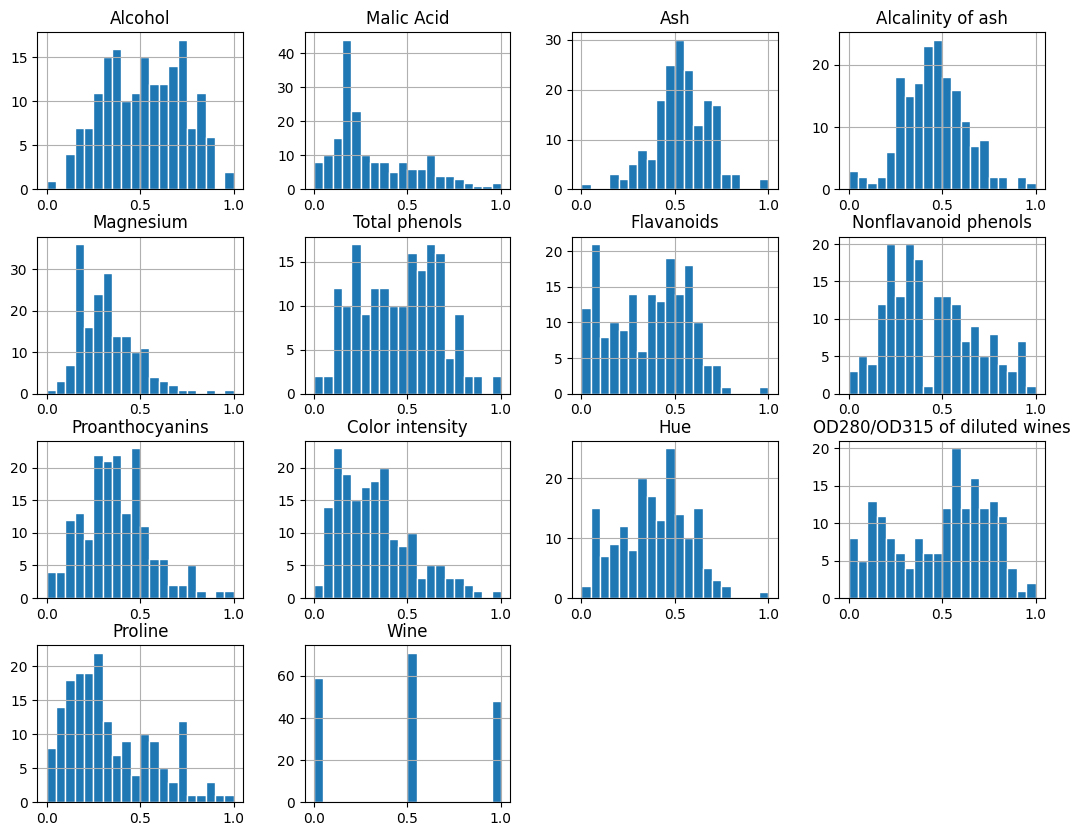

In [63]:
normalized_df.hist(figsize=(13, 10), bins=20, edgecolor="white")

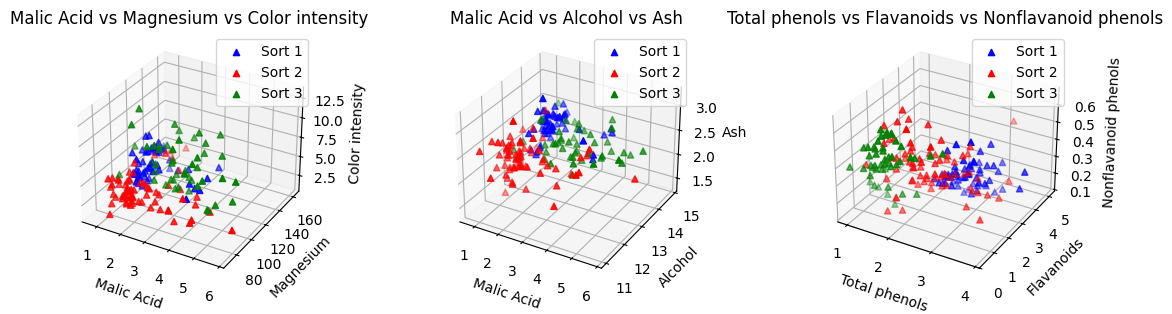

In [64]:
df_sort1 = df[df['Wine'] == 1]
df_sort2 = df[df['Wine'] == 2]
df_sort3 = df[df['Wine'] == 3]


fig = plt.figure(figsize=(13, 13))
plt.subplots_adjust(hspace=0.7, wspace=0.5)


# Malic Acid vs Magnesium vs Color intensity
ax1 = fig.add_subplot(131, projection='3d')
par1_ax1 = 'Malic Acid'
par2_ax1 = 'Magnesium'
par3_ax1 = 'Color intensity'
ax1.scatter(df_sort1[par1_ax1], df_sort1[par2_ax1], df_sort1[par3_ax1],
            c='blue', marker='^', label='Sort 1')
ax1.scatter(df_sort2[par1_ax1], df_sort2[par2_ax1], df_sort2[par3_ax1],
            c='red', marker='^', label='Sort 2')
ax1.scatter(df_sort3[par1_ax1], df_sort3[par2_ax1], df_sort3[par3_ax1],
            c='green', marker='^', label='Sort 3')
ax1.set_xlabel(par1_ax1)
ax1.set_ylabel(par2_ax1)
ax1.set_zlabel(par3_ax1)
ax1.set_title('Malic Acid vs Magnesium vs Color intensity')
ax1.legend()

# Malic Acid vs Alcohol vs Ash
par1_ax2 = 'Malic Acid'
par2_ax2 = 'Alcohol'
par3_ax2 = 'Ash'
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df_sort1[par1_ax2], df_sort1[par2_ax2], df_sort1[par3_ax2],
            c='blue', marker='^', label='Sort 1')
ax2.scatter(df_sort2[par1_ax2], df_sort2[par2_ax2], df_sort2[par3_ax2],
            c='red', marker='^', label='Sort 2')
ax2.scatter(df_sort3[par1_ax2], df_sort3[par2_ax2], df_sort3[par3_ax2],
            c='green', marker='^', label='Sort 3')
ax2.set_xlabel(par1_ax2)
ax2.set_ylabel(par2_ax2)
ax2.set_zlabel(par3_ax2)
ax2.set_title('Malic Acid vs Alcohol vs Ash')
ax2.legend()

# Total phenols vs Flavanoids vs Nonflavanoid phenols
ax3 = fig.add_subplot(133, projection='3d')
par1_ax3 = 'Total phenols'
par2_ax3 = 'Flavanoids'
par3_ax3 = 'Nonflavanoid phenols'
ax3.scatter(df_sort1[par1_ax3], df_sort1[par2_ax3], df_sort1[par3_ax3],
            c='blue', marker='^', label='Sort 1')
ax3.scatter(df_sort2[par1_ax3], df_sort2[par2_ax3], df_sort2[par3_ax3],
            c='red', marker='^', label='Sort 2')
ax3.scatter(df_sort3[par1_ax3], df_sort3[par2_ax3], df_sort3[par3_ax3],
            c='green', marker='^', label='Sort 3')
ax3.set_xlabel(par1_ax3)
ax3.set_ylabel(par2_ax3)
ax3.set_zlabel(par3_ax3)
ax3.set_title('Total phenols vs Flavanoids vs Nonflavanoid phenols')
ax3.legend()


Разделение данных на обучающие и тестовые наборы.

Для равномерного распределения данных нужно, чтобы обучающие и тестовые наборы содержали в себе все три вида вина пропорционально.


In [65]:
import random

def train_test_split_data(x, y, test_ratio=0.2):
    data_length = len(x)
    all_indices = list(range(data_length))
    random.shuffle(all_indices)

    split_point = int(data_length * (1 - test_ratio))

    train_indices = all_indices[:split_point]
    test_indices = all_indices[split_point:]

    X_train = np.array([x[idx] for idx in train_indices])
    X_test = np.array([x[idx] for idx in test_indices])
    y_train = np.array([y[idx] for idx in train_indices])
    y_test = np.array([y[idx] for idx in test_indices])

    return X_train, X_test, y_train, y_test


Реализация метода ближайших соседей

In [66]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))


def k_nearest_neighbors(X_train, y_train, X_test, k=3):
    y_pred = []  

    for test_point in X_test:
        distances = np.array([euclidean_distance(test_point, x) for x in X_train])
        k_indices = distances.argsort()[:k]
        # Получаем метки k ближайших соседей
        k_nearest_labels = y_train[k_indices]
        # Находим наиболее часто встречающуюся метку среди соседей
        most_common = Counter(k_nearest_labels).most_common(1)
        y_pred.append(most_common[0][0])

    return np.array(y_pred) 

Функция для создания confusion matrix

In [67]:
def confusion_matrix_pandas(y_true, y_pred):
    return pd.crosstab(pd.Series(y_true, name='Actual'), pd.Series(y_pred, name='Predicted'))

In [68]:
X = df.drop(columns=['Wine']).values
y = df['Wine'].values

X_train, X_test, y_train, y_test = train_test_split_data(X, y)

# Модель 1: Признаки отбираются случайно
random_columns = np.random.choice(X.shape[1], size=3, replace=False)
X_train_random = X_train[:, random_columns]
X_test_random = X_test[:, random_columns]

# Модель 2: Фиксированный набор признаков
fixed_columns = [0, 1, 2]  # Indices for Malic Acid, Alcohol, Ash
X_train_fixed = X_train[:, fixed_columns]
X_test_fixed = X_test[:, fixed_columns]

k_values = [3, 5, 10]
for k in k_values:
    y_pred_random = k_nearest_neighbors(X_train_random, y_train, X_test_random, k)
    cm_random = confusion_matrix_pandas(y_test, y_pred_random)
    print(f"Матрица ошибок для случайных признаков (k={k}):\n{cm_random}")

    y_pred_fixed = k_nearest_neighbors(X_train_fixed, y_train, X_test_fixed, k)
    cm_fixed = confusion_matrix_pandas(y_test, y_pred_fixed)
    print(f"Матрица ошибок для фиксированных признаков (k={k}):\n{cm_fixed}")



Матрица ошибок для случайных признаков (k=3):
Predicted  1   2  3
Actual             
1          7   0  1
2          0  14  1
3          2   3  8
Матрица ошибок для фиксированных признаков (k=3):
Predicted  1   2   3
Actual              
1          7   0   1
2          1  13   1
3          2   1  10
Матрица ошибок для случайных признаков (k=5):
Predicted  1   2  3
Actual             
1          7   0  1
2          0  15  0
3          1   5  7
Матрица ошибок для фиксированных признаков (k=5):
Predicted  1   2   3
Actual              
1          7   0   1
2          1  13   1
3          1   2  10
Матрица ошибок для случайных признаков (k=10):
Predicted  1   2  3
Actual             
1          7   0  1
2          0  15  0
3          1   5  7
Матрица ошибок для фиксированных признаков (k=10):
Predicted  1   2  3
Actual             
1          7   0  1
2          1  13  1
3          1   4  8
